Import the necessary packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd

Read in the data from csv

In [38]:
data0 = pd.read_csv("death-rate-from-suicides-gho new.csv")
display(data0)
print(data0.columns.tolist())

,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
0,Belize,BLZ,2000,10.0134
1,United States,USA,2000,10.0171
2,Uzbekistan,UZB,2000,12.0487
3,Ireland,IRL,2000,12.0547
4,Djibouti,DJI,2000,12.0624
...,...,...,...,...
3871,Singapore,SGP,2019,9.65
3872,Nepal,NPL,2019,9.77
3873,Pakistan,PAK,2019,9.77
3874,Switzerland,CHE,2019,9.83


['Entity', 'Code', 'Year', 'Age-standardized suicide rate - Sex: both sexes']


Rank the countries by suicide rate


C:\Users\User\AppData\Local\Temp\ipykernel_676\1026209002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate']=data['rate'].astype(float)


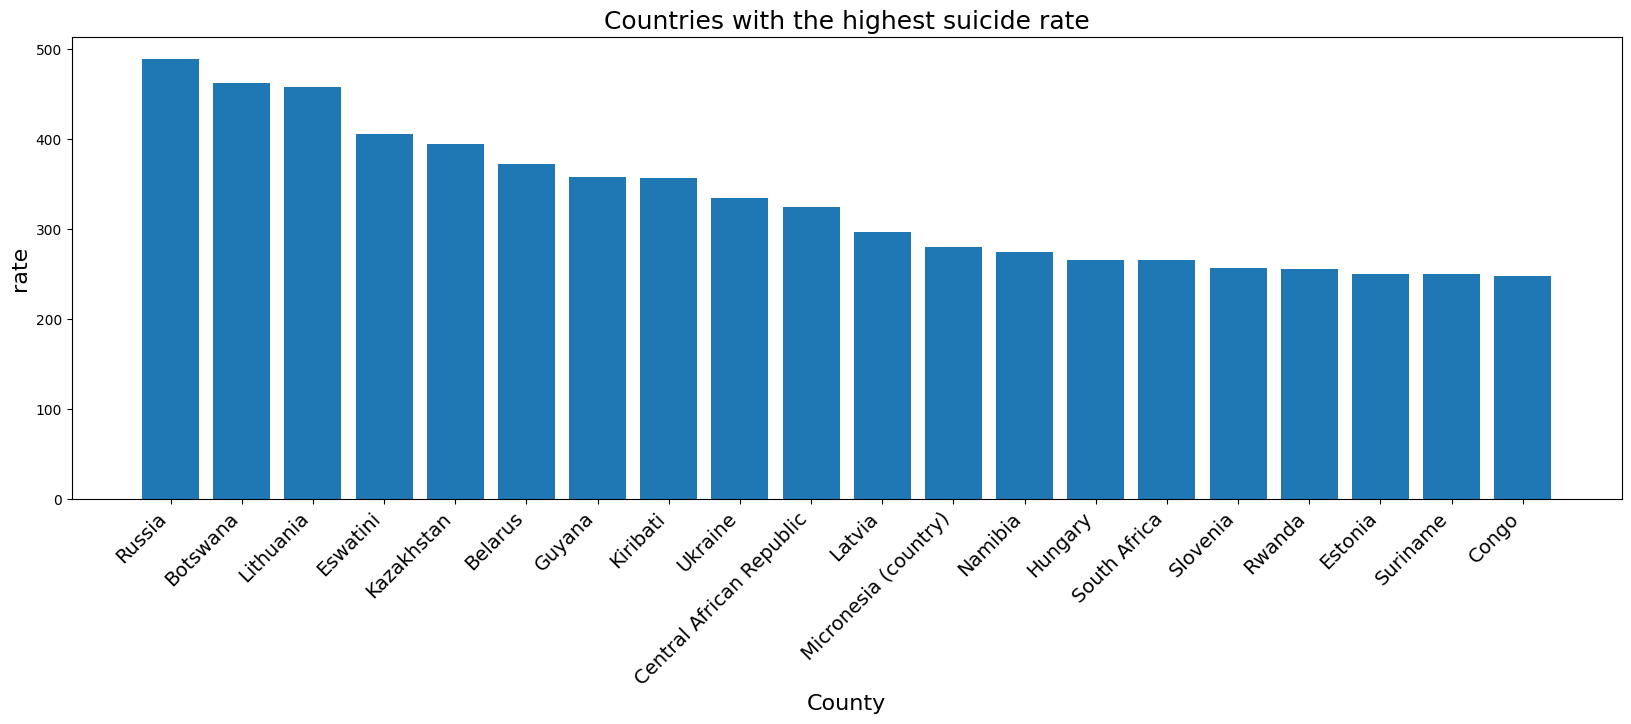

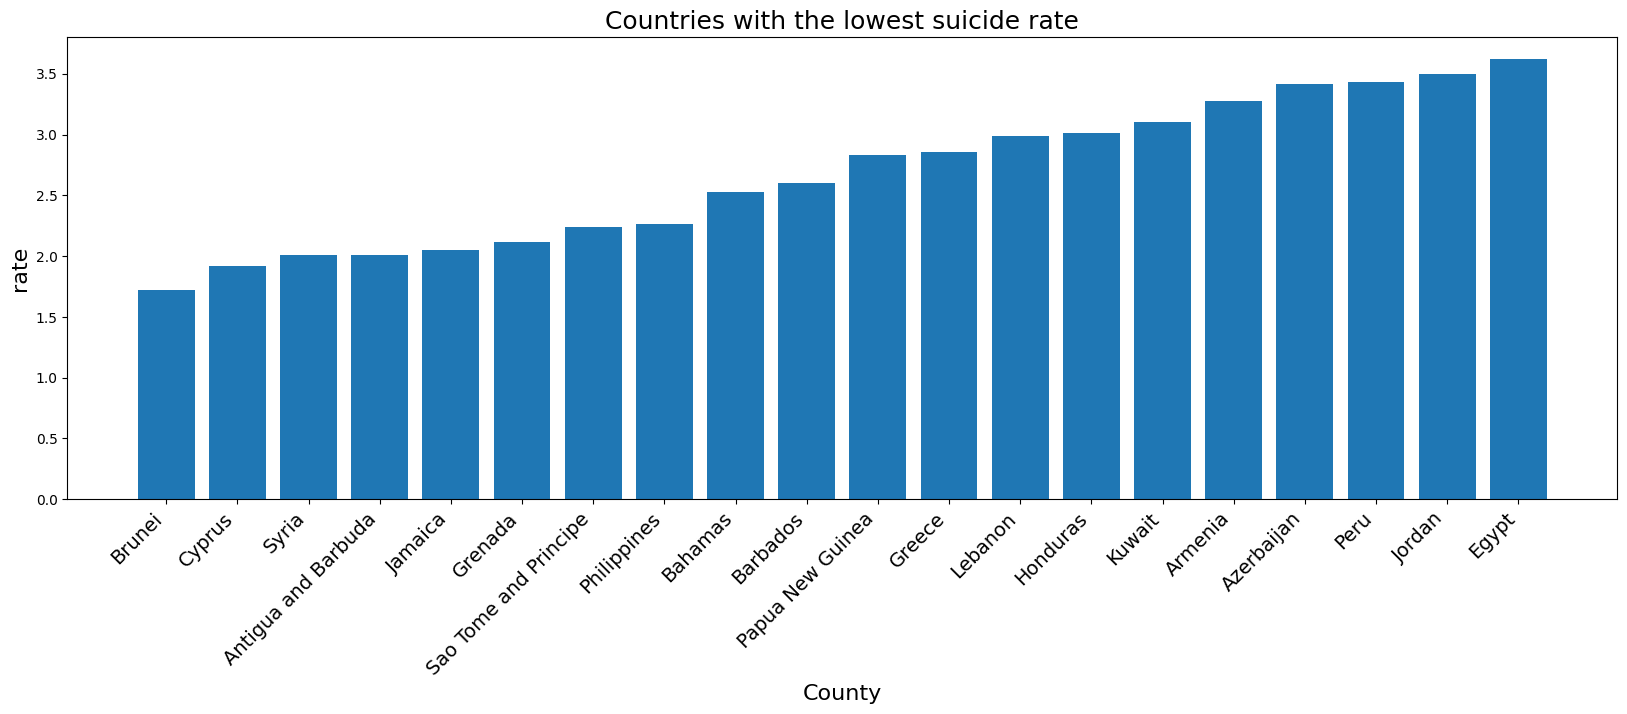

In [44]:
data0.columns=['Entity','code','Year','rate']
data0=data0[data0['Year']==2000]
data0=data0.dropna()
data=data0[['code','rate','Entity']]
data['rate']=data['rate'].astype(float)
data2=data.sort_values('rate',ascending=False)
datatop=data2[0:20]
plt.figure(figsize=(20,6))
plt.bar(datatop['Entity'], datatop['rate'])
plt.xlabel('County', fontsize=16) 
plt.ylabel('rate', fontsize=16) 
plt.xticks(rotation=45, ha='right', fontsize=14) 
plt.title('Countries with the highest suicide rate', fontsize=18)  
plt.show()
#The lowest suicide rate 
data2=data.sort_values('rate',ascending=True)
datatop=data2[0:20]
plt.figure(figsize=(20,6))
plt.bar(datatop['Entity'], datatop['rate'])
plt.xlabel('County', fontsize=16) 
plt.ylabel('rate', fontsize=16) 
plt.xticks(rotation=45, ha='right', fontsize=14) 
plt.title('Countries with the lowest suicide rate', fontsize=18)  
plt.show()

Find the year with the most suicides

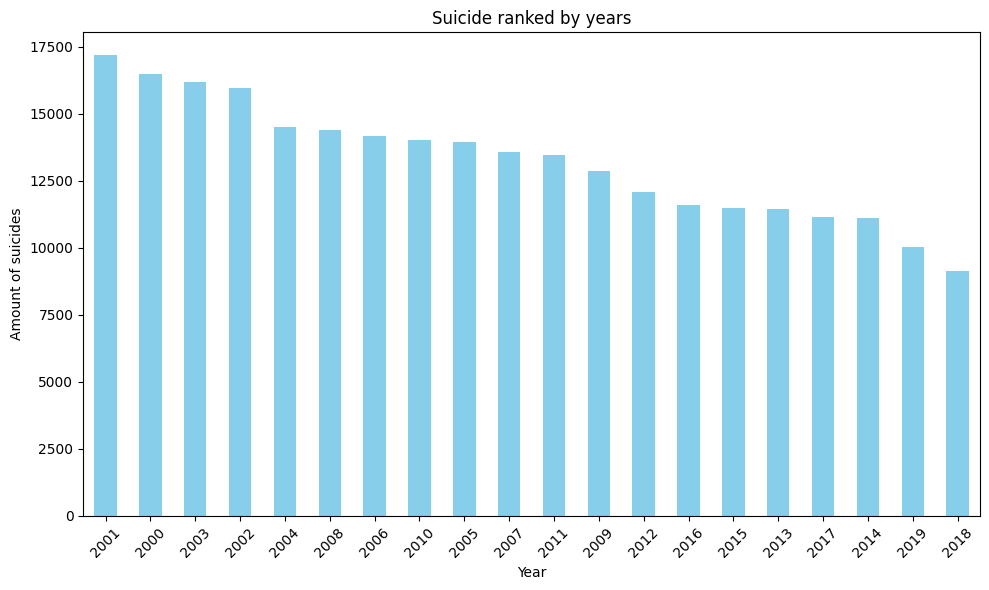

In [83]:
data=pd.read_csv('death-rate-from-suicides-gho new.csv')
data.columns=['Entity','code','Year','rate']
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')
yearly_suicides = data.groupby('Year')['rate'].sum()

yearly_suicides_sorted = yearly_suicides.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
yearly_suicides_sorted.plot(kind='bar', color='skyblue')
plt.title('Suicide ranked by years')
plt.xlabel('Year')
plt.ylabel('Amount of suicides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Display data on the world map

C:\Users\User\AppData\Local\Temp\ipykernel_676\1555302053.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1500x700 with 0 Axes>

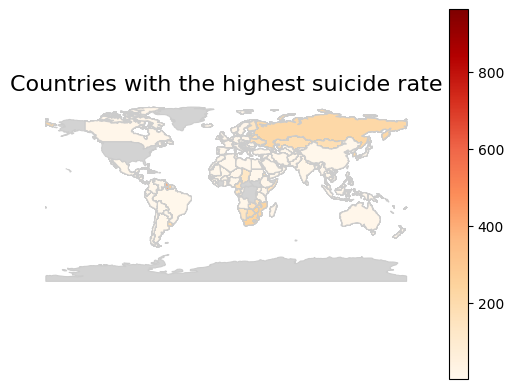

In [105]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(data, left_on='name', right_on='Entity', how='left')

plt.figure(figsize=(15, 7))
world.plot(column='rate', cmap='OrRd', legend=True, linewidth=0.8, edgecolor='0.8', missing_kwds={'color': 'lightgrey'})
plt.title('Countries with the highest suicide rate', fontsize=16)
plt.axis('off')
plt.show()